<a href="https://colab.research.google.com/github/sayyed-uoft/TSSA/blob/main/Vector_Institute_Predictive_Maintenance_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Institute - TSSA Intro to AI 

### Thank you for joining Day 1 of the Vector Institute, 'Intro to AI' workshop series.

If you have any questions or if you would like to learn more about this program, contact: learn@vectorinstitute.ai

# Case Study 1: Elevator Failures (2018)


*   Cloud platform predicts elevator failures with 90% accuracy..

*   ThyssenKrupp is a leader in urban mobility and has developed, MAX, a real-time cloud-based predictive maintenance solution. MAX is built on the Microsoft Azure Machine Learning platform to solve problems of elevator downtime by proactively identifying issues before they occur and increasing elevator availability.








## Context


*   Predictive maintenance techniques are designed to help determine the condition of in-service equipment in order to estimate when maintenance should be performed. 
*   This approach promises cost savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.
*   It is regarded as condition-based maintenance carried out as suggested by estimations of the degradation state of an item.



## Goal
*   Predict the RUL (Remaining Useful Life) of an engine. 

## Dataset - Nasa Turbofan Dataset:

*   It consists of different multivariate time-series. These different time-series refer to different engines. The sampling of the time series is 1 point per engine cycle. 
*   The dataset is split into train data and test data to evaluate your model.
*   In the dataset, the engine runs until failure. This means that for each data point we can associate the RUL (Remaining Useful Life in cycles). 


# End-to-end Machine Learning
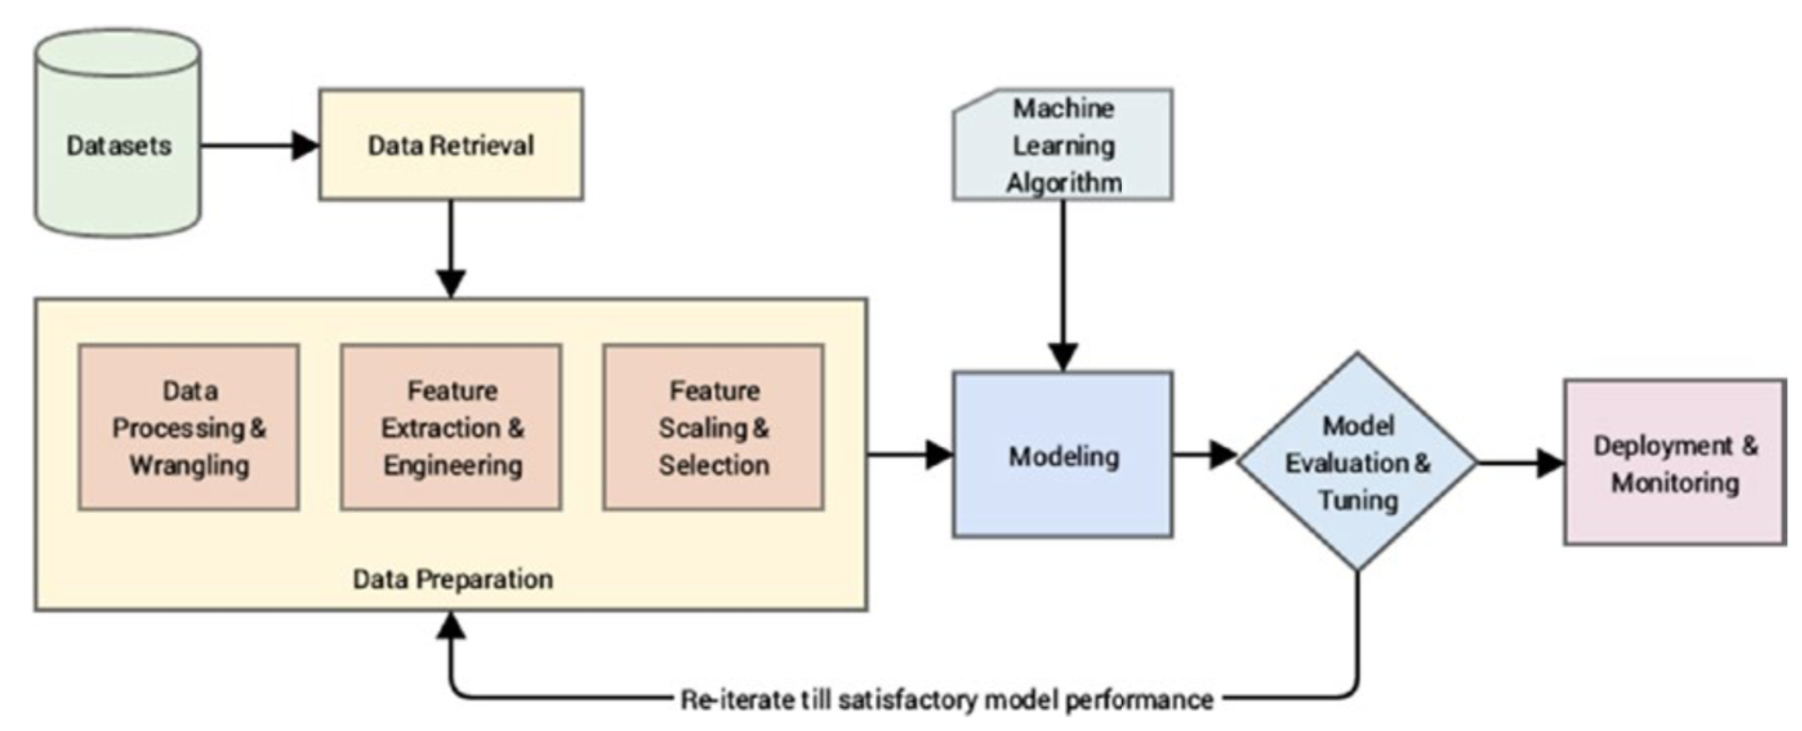

## Start the Tutorial
Begin the programming tutorial. You may run the code by hovering on the [ ] brackets on the left of the code and clicking on the 'play' button.

In [ ]:
## Load packages to perform common tasks in Python
from random import randint
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [ ]:
## Create a data frame called df_train and pull in data from a .csv file. 

operational_settings = ['op_setting_{}'.format(i + 1) for i in range (3)]
sensor_columns = ['sensor_{}'.format(i + 1) for i in range(27)]
features = operational_settings + sensor_columns
metadata = ['engine_no', 'time_in_cycles']
list_columns = metadata + features

df_train = pd.read_csv('https://raw.githubusercontent.com/sayyed-uoft/TSSA/main/train_FD001.txt', sep=' ', 
                       header=None, names=list_columns)

In [ ]:
## Let's look at the data set.

df_train

## Calculate the RUL (Remaining Useful Life)

In [ ]:
def add_rul(g):
    g['RUL'] = [max(g['time_in_cycles'])] * len(g)
    g['RUL'] = g['RUL'] - g['time_in_cycles']
    del g['engine_no']
    return g.reset_index()

df_train = df_train.groupby('engine_no').apply(add_rul).reset_index()
del df_train['level_1']

In [ ]:
df_train

In [ ]:
df = df_train.copy()

## Conduct the data analysis

In [ ]:
df.info()

In [ ]:
df.describe()

## Data Preprocessing

Find columns that can be droped: 

1.   Remove columns with missing data
2.   Remove columns with constant data
3.   Split training data to “training + validation” (80 % + 20%)


Selected Features:
['op_setting_1', 'op_setting_2', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_18', 'sensor_20', 'sensor_21']


In [ ]:
nan_column = df.columns[df.isna().any()].tolist()
const_columns = [c for c in df.columns if len(df[c].drop_duplicates()) <= 2]
print('Columns with all nan: \n' + str(nan_column) + '\n')
print('Columns with all const values: \n' + str(const_columns) + '\n')

In [ ]:
number_of_engine_no = len(df['engine_no'].drop_duplicates())

engine_no_val = range(50, 70)
engine_no_train = [x for x in range(number_of_engine_no) if x not in engine_no_val]

### Selecting only relevant features

In [ ]:
selected_features = [x for x in features if x not in nan_column + const_columns]
selected_features

## Splitting the Training and Validation Data

### Actually making the split

In [ ]:
data_train = df[df['engine_no'].isin(engine_no_train)]
data_val = df[df['engine_no'].isin(engine_no_val)]

X_train, y_train = data_train[selected_features], data_train['RUL'] 
X_val, y_val = data_val[selected_features], data_val['RUL']

In [ ]:
X_train

In [ ]:
y_train

# Choosing and Training a Model

*   Data is sequential (time-series) and therefore, the best is to use a sequential model. However, for simplicity, we will try to create a model that predicts RUL based on a current data only (knowing the result won’t be great)

*   Start with the simplest model (linear model)

### Training a linear model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

### Make prediction on training and validation data

In [ ]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

### Calculate error on training and validation data

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE on Training: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('RMSE on Validation: {:.2f}'.format(np.sqrt(mean_squared_error(y_val, y_val_pred))))

### Plot absolute error against true value

In [ ]:
y_val_error = np.abs(y_val - y_val_pred)
plt.scatter(y_val, y_val_error, alpha=0.2)
plt.xlabel("RUL")
plt.ylabel("Absolute Error")

### Training a random forest

In [ ]:
#This may take a moment to run.

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

### Make prediction on training and validation data

In [ ]:
y_train_pred = rf_reg.predict(X_train)
y_val_pred = rf_reg.predict(X_val)

### Calculate error on training and validation data

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE on Training: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('RMSE on Validation: {:.2f}'.format(np.sqrt(mean_squared_error(y_val, y_val_pred))))

### Plot absolute error against true value

In [ ]:
y_val_error = np.abs(y_val - y_val_pred)
plt.scatter(y_val, y_val_error, alpha=0.2)
plt.xlabel("RUL")
plt.ylabel("Absolute Error")

# Notes


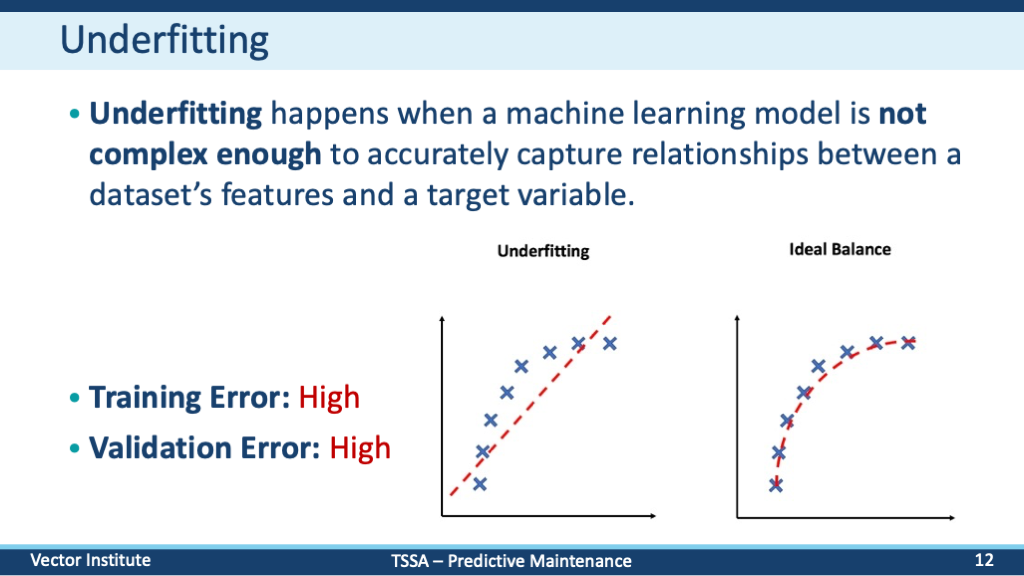

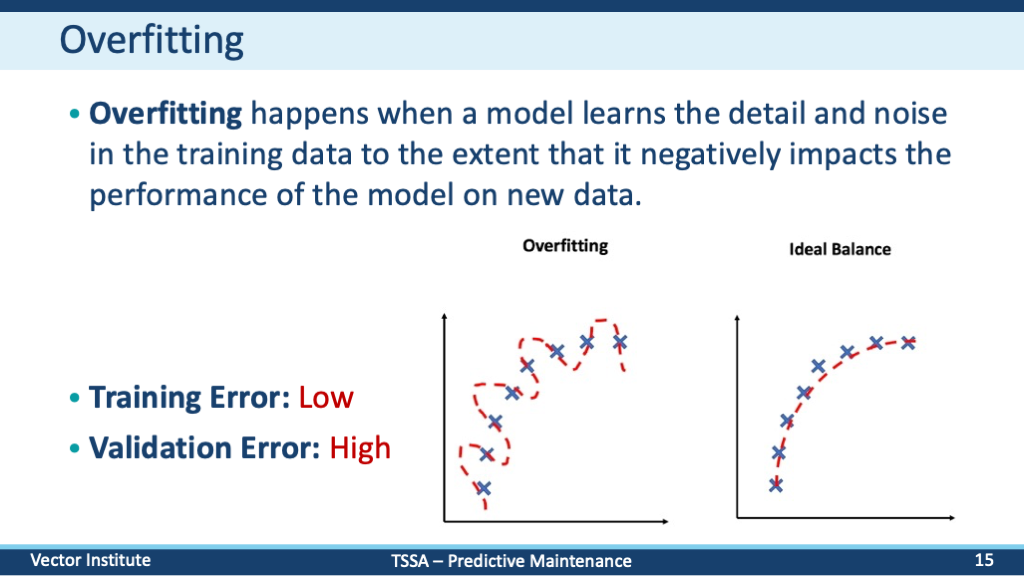

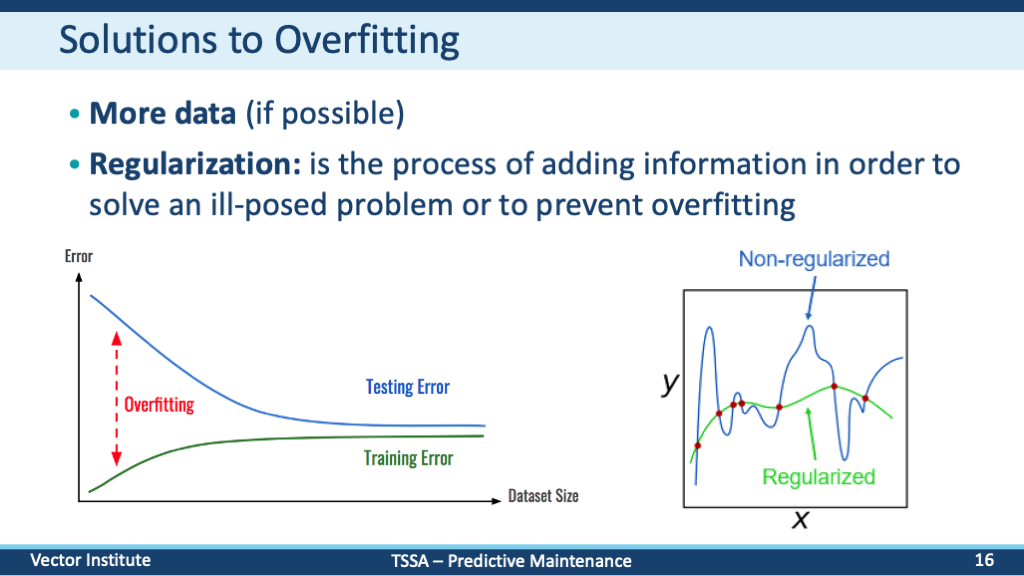

# Contact Information

Congratulations, you have completed the tutorial for Day 1 of the Vector Institute 'Intro to AI' program! Thank you for your time and attention.


*   Instructor: Sayyed Nezhadi 
*   Program Director: Shingai Manjengwa 
*   Contact: learn@vectorinstitute.ai

Never stop learning!

